In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "shashanksharmajbjksg"
os.environ['KAGGLE_KEY'] = "88e91239d3487525a2e8ca3e91a746a5"

In [ ]:
import kaggle

dataset_path = 'cicdataset/cicids2017'
download_path = '/content'

kaggle.api.authenticate()
kaggle.api.dataset_download_files(dataset_path, download_path, unzip=True)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None
df1=pd.read_csv("/content/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("/content/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("/content/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("/content/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("/content/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("/content/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("/content/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("/content/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None
dfs = [df1, df2, df3, df4, df5, df6, df7, df8]
df = pd.concat(dfs)
del dfs

nRow, nCol = df.shape

In [ ]:
df.to_csv("Data.csv")

# Start Here if you already have Data.csv

In [1]:
# Data saved to another file so we don't have to download and combmine them again and again
# Run the below line if you already have the Data file
import pandas as pd
import numpy as np

df=pd.read_csv("Data.csv")

In [ ]:
df.info()

In [ ]:
df.shape

(283074, 79)

In [ ]:
df.isnull().sum()

In [2]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [ ]:
print(df.duplicated().sum(), "fully duplicate rows to remove")

12 fully duplicate rows to remove


In [3]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum(), "fully duplicate rows to remove")

0 fully duplicate rows to remove


In [ ]:
df.describe()

In [ ]:
df[" Label"].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

**Create a new Col Intrusion which is 0 if the Label is BENIGN and 1 Everywhere else depicting intrusion detection**

In [4]:
df['Intrusion'] = df[' Label'].apply(lambda x: 1 if x != 'BENIGN' else 0)
df.drop(columns=[' Label'], inplace=True)

In [ ]:
df.describe()

# Step 1: Data Preprocessing

1. Data Normalization

In [5]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)

In [6]:
X = df_scaled.drop(columns=['Intrusion'])
Y = df_scaled['Intrusion']

2. Oversampling(SMOTEDBoost)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)


X_resampled, Y_resampled = smote.fit_resample(X, Y)

# Step 2: Feature Selection

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

1. SFM With Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

base_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

sfm = SelectFromModel(estimator=base_classifier, threshold='mean')
X_train_sfm = sfm.fit_transform(X_train, Y_train)
selected_features_sfm = X_train.columns[sfm.get_support()]
feature_importances_sfm = sfm.estimator_.feature_importances_

<ipython-input-19-0e547ab37a32>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_sfm[top_20_indices], y=top_20_features,palette='viridis')


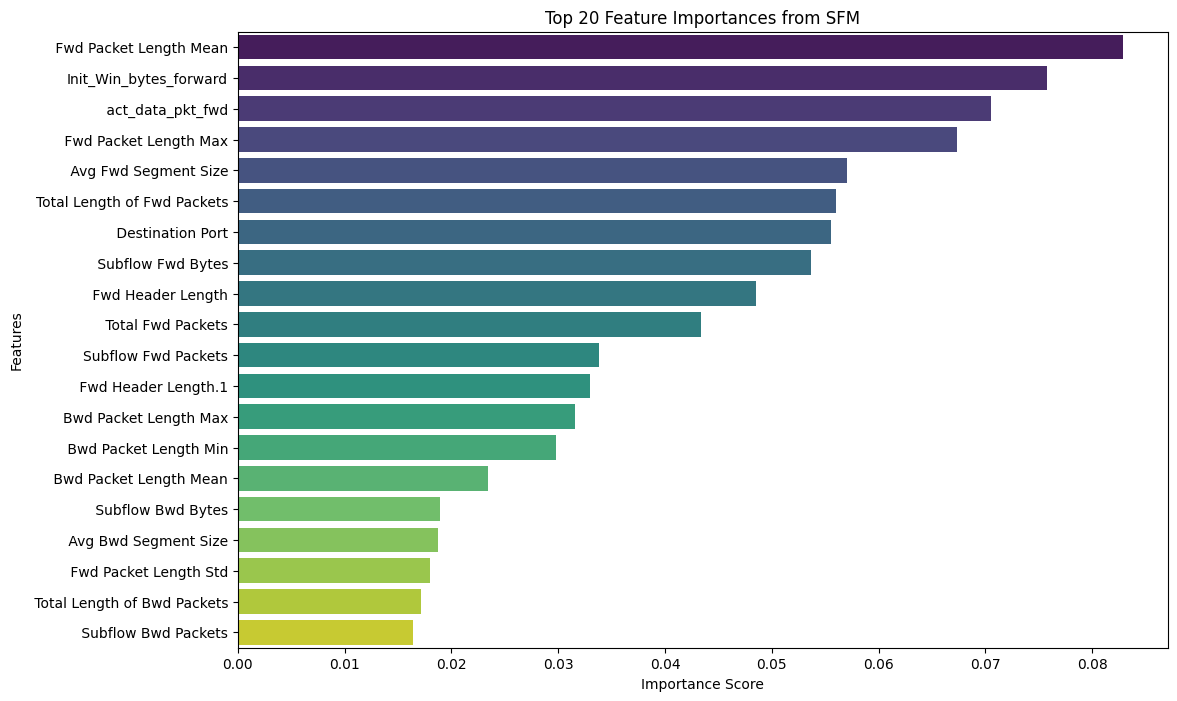

In [19]:
feature_importances_sfm = sfm.estimator_.feature_importances_
top_20_indices = feature_importances_sfm.argsort()[-20:][::-1]
top_20_features = X_train.columns[top_20_indices]


plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances_sfm[top_20_indices], y=top_20_features,palette='viridis')
plt.title("Top 20 Feature Importances from SFM")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

2. Random Forest Feature Importance

In [17]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, Y_train)
feature_importances_rf = rf_classifier.feature_importances_

<ipython-input-18-8a5c86f4fc81>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_rf[top_20_indices_rf], y=top_20_features_rf, palette='viridis')


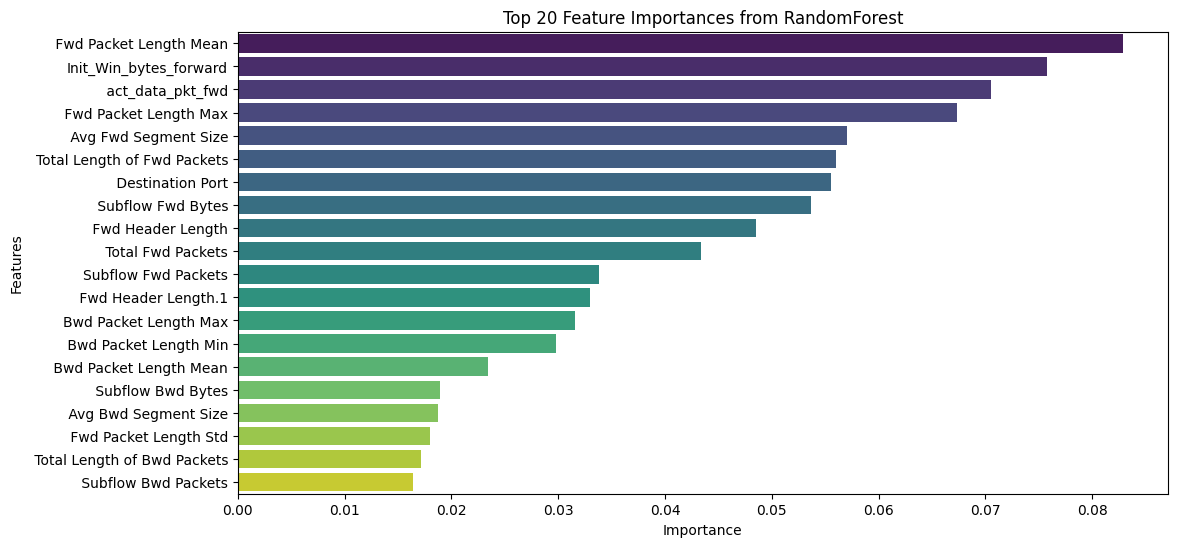

In [18]:
top_20_indices_rf = feature_importances_rf.argsort()[-20:][::-1]
top_20_features_rf = X.columns[top_20_indices_rf]

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances_rf[top_20_indices_rf], y=top_20_features_rf, palette='viridis')
plt.title('Top 20 Feature Importances from RandomForest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

3. Permutation Importance

In [20]:
from sklearn.decomposition import PCA


pca = PCA(n_components=79)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, Y_train)

feature_importances_pca = rf_classifier_pca.feature_importances_

<ipython-input-21-1ee0f39b7d4b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_pca[top_20_indices_pca], y=top_20_features_pca,palette='viridis')


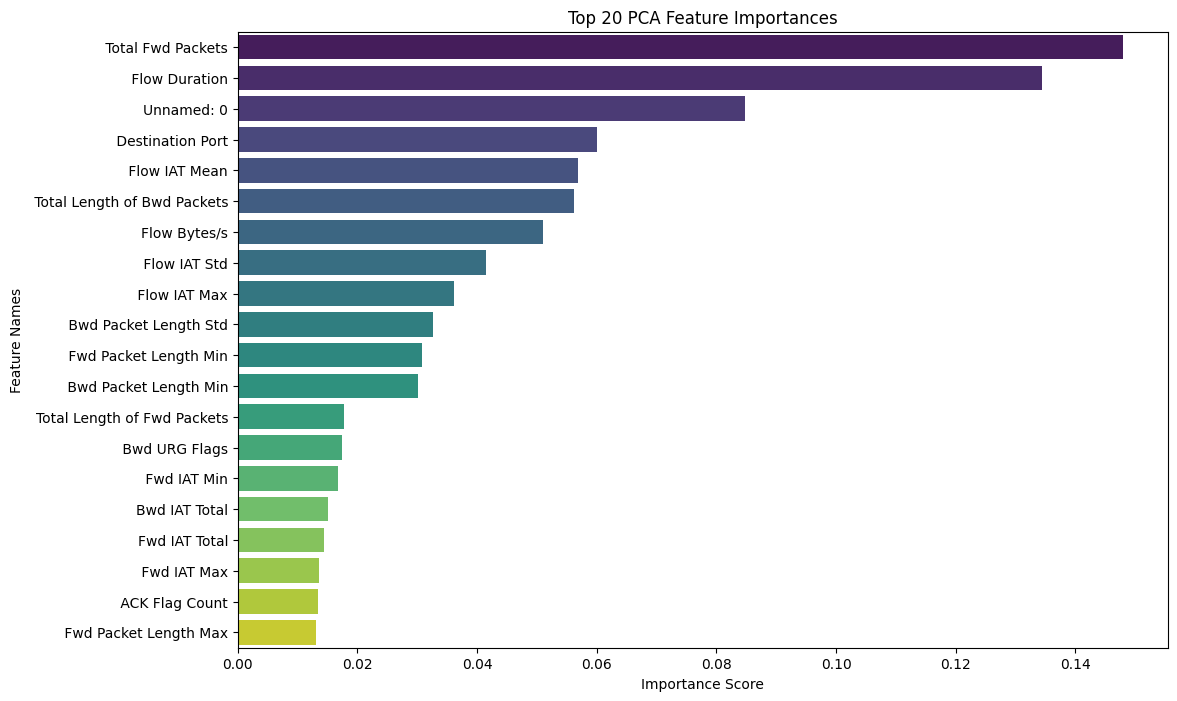

In [21]:
original_feature_names = X_train.columns
top_20_indices_pca = feature_importances_pca.argsort()[-20:][::-1]
top_20_features_pca = original_feature_names[top_20_indices_pca]


plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances_pca[top_20_indices_pca], y=top_20_features_pca,palette='viridis')
plt.title("Top 20 PCA Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature Names")
plt.show()

Final average feature Importance

In [39]:
average_importance = (feature_importances_sfm + feature_importances_rf + feature_importances_pca) / 3


num_selected_features = 10
selected_features_indices = np.argsort(average_importance)[:num_selected_features]
selected_features = X.columns[selected_features_indices]


final_optimized_features = X[selected_features]

In [40]:
selected_features

Index([' Bwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk',
       'Bwd Avg Bulk Rate', ' Active Std', 'Active Mean', ' Idle Std',
       ' Active Min', ' Idle Min', ' Idle Max'],
      dtype='object')

<ipython-input-43-22e3a660026a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=adjusted_importances, y=selected_features, palette='viridis')


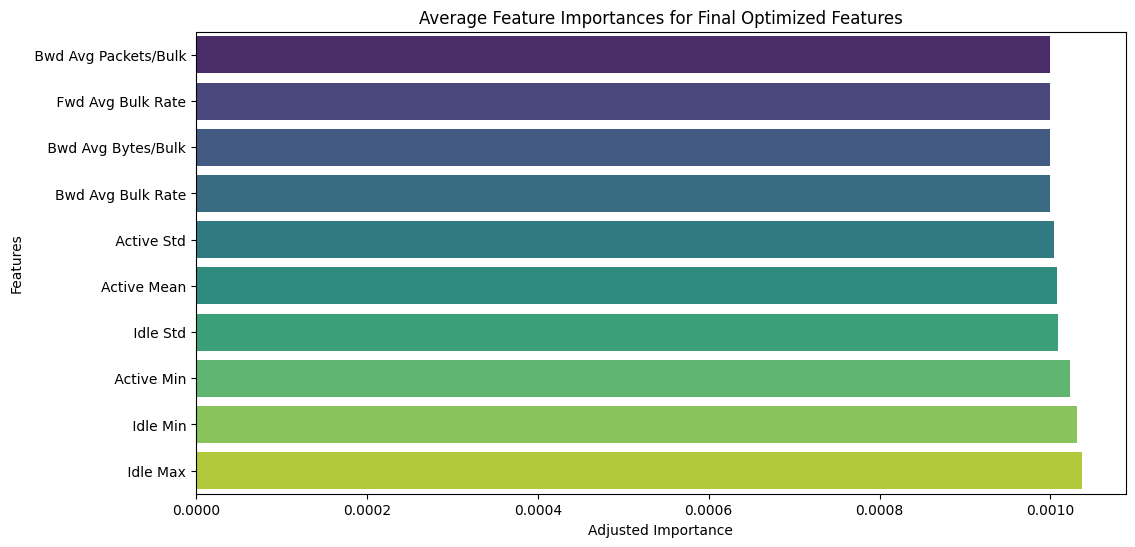

In [43]:
min_importance = min(average_importance)
small_value = 0.001
adjusted_importances = average_importance[selected_features_indices] - min_importance + small_value
plt.figure(figsize=(12, 6))
sns.barplot(x=adjusted_importances, y=selected_features, palette='viridis')
plt.title('Average Feature Importances for Final Optimized Features')
plt.xlabel('Adjusted Importance')
plt.ylabel('Features')
plt.show()


# Step 3: Model Training and Ensemble

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Step 1: Random Forest + Extra Trees Training

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Random Forest model on final optimized features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train[selected_features], Y_train)

# Train Extra Trees model on final optimized features
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train[selected_features] , Y_train)

ExtraTreesClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test[selected_features])
et_predictions = et_model.predict(X_test[selected_features])

# Evaluate Random Forest model
rf_accuracy = accuracy_score(Y_test, rf_predictions)
rf_precision = precision_score(Y_test, rf_predictions, average='weighted')
rf_recall = recall_score(Y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(Y_test, rf_predictions, average='weighted')
rf_conf_matrix = confusion_matrix(Y_test, rf_predictions)

# Evaluate Extra Trees model
et_accuracy = accuracy_score(Y_test, et_predictions)
et_precision = precision_score(Y_test, et_predictions, average='weighted')
et_recall = recall_score(Y_test, et_predictions, average='weighted')
et_f1 = f1_score(Y_test, et_predictions, average='weighted')
et_conf_matrix = confusion_matrix(Y_test, et_predictions)

# Display metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print(f"Confusion Matrix:\n{rf_conf_matrix}")

# Display metrics for Extra Trees
print("\nExtra Trees Metrics:")
print(f"Accuracy: {et_accuracy}")
print(f"Precision: {et_precision}")
print(f"Recall: {et_recall}")
print(f"F1 Score: {et_f1}")
print(f"Confusion Matrix:\n{et_conf_matrix}")


Random Forest Metrics:
Accuracy: 0.8738291703835861
Precision: 0.880683547917928
Recall: 0.8738291703835861
F1 Score: 0.8481306741598074
Confusion Matrix:
[[43778   249]
 [ 6540  3241]]

Extra Trees Metrics:
Accuracy: 0.877862027951234
Precision: 0.8832115550486205
Recall: 0.877862027951234
F1 Score: 0.854834191629068
Confusion Matrix:
[[43733   294]
 [ 6278  3503]]


Step 2: Stacking Ensemble Classifier

In [ ]:
stacking_classifier = StackingClassifier(
    estimators=[('random_forest', rf_model), ('extra_trees', et_model)],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    stack_method='auto',
    n_jobs=-1
)

In [ ]:
stacking_classifier.fit(X_train[selected_features], Y_train)
stacking_predictions = stacking_classifier.predict(X_test[selected_features ])
accuracy_score(Y_test, stacking_predictions)

0.8798319952423431

In [ ]:
stacked_accuracy = accuracy_score(Y_test, stacking_predictions)
stacked_precision = precision_score(Y_test, stacking_predictions, average='weighted')
stacked_recall = recall_score(Y_test, stacking_predictions, average='weighted')
stacked_f1 = f1_score(Y_test, stacking_predictions, average='weighted')
stacked_conf_matrix = confusion_matrix(Y_test, stacking_predictions)

# Display metrics for Stacking Model
print("\nStacking Model Metrics:")
print(f"Accuracy: {stacked_accuracy}")
print(f"Precision: {stacked_precision}")
print(f"Recall: {stacked_recall}")
print(f"F1 Score: {stacked_f1}")
print(f"Confusion Matrix:\n{stacked_conf_matrix}")


Stacking Model Metrics:
Accuracy: 0.8798319952423431
Precision: 0.8862651004549165
Recall: 0.8798319952423431
F1 Score: 0.8573139505418373
Confusion Matrix:
[[43774   253]
 [ 6213  3568]]
